### Step 1: Load the Dataset and Explore

In [1]:
import pandas as pd

# Load the dataset
file_path = 'real_estate_price_size.csv'  # Update this to your file path if necessary
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
               price         size
count     100.000000   100.000000
mean   292289.470160   853.024200
std     77051.727525   297.941951
min    154282.128000   479.750000
25%    234280.148000   643.330000
50%    280590.716000   696.405000
75%    335723.696000  1029.322500
max    500681.128000  1842.510000


### Step 2: Perform Regression Analysis

In [9]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = data['size']  # Property size
y = data['price']  # Property price

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           8.13e-31
Time:                        19:14:16   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.0

### Step 3: Decomposition of Variability

In [12]:
# Predicted values
y_pred = model.predict(X)

# Decompose variability
y_mean = y.mean()

# Total Sum of Squares (SST)
SST = sum((y - y_mean) ** 2)

# Regression Sum of Squares (SSR)
SSR = sum((y_pred - y_mean) ** 2)

# Sum of Squares of Errors (SSE)
SSE = sum((y - y_pred) ** 2)

# Variance explained by the model (R-squared)
R_squared = SSR / SST

# Print results
print(f"SST (Total Variability): {SST:.2f}")
print(f"SSR (Explained Variability): {SSR:.2f}")
print(f"SSE (Unexplained Variability): {SSE:.2f}")
print(f"R-squared: {R_squared:.2f}")


SST (Total Variability): 587759902740.05
SSR (Explained Variability): 437727831873.76
SSE (Unexplained Variability): 150032070866.29
R-squared: 0.74


### Step 4: Model Validation

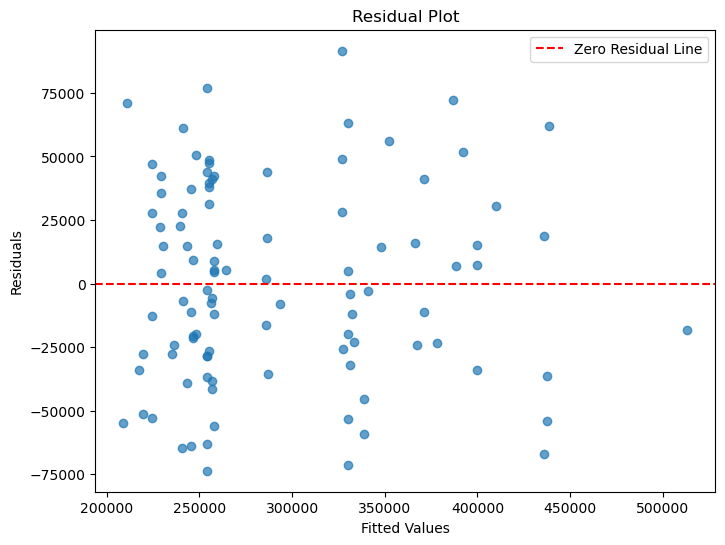

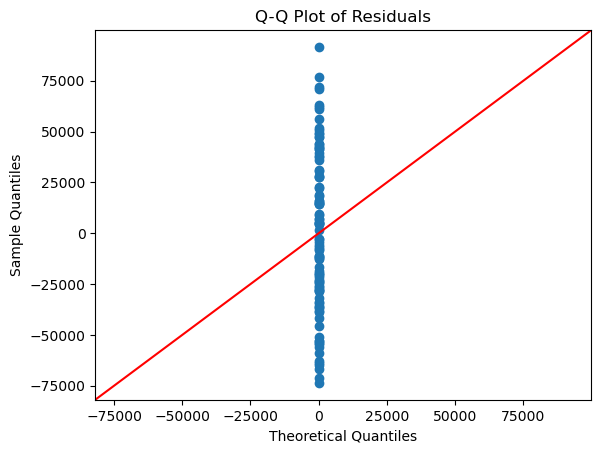

In [25]:
import matplotlib.pyplot as plt

# Residuals
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()



### Step 5: Predictions

In [21]:
# Predict prices for given sizes
sizes_to_predict = [750, 1200, 2000]
predicted_prices = model.predict(sm.add_constant(pd.Series(sizes_to_predict)))

# Display predictions
for size, price in zip(sizes_to_predict, predicted_prices):
    print(f"Predicted price for a property size of {size} sqft: {price:.2f}")



Predicted price for a property size of 750 sqft: 269296.66
Predicted price for a property size of 1200 sqft: 369727.09
Predicted price for a property size of 2000 sqft: 548270.09
